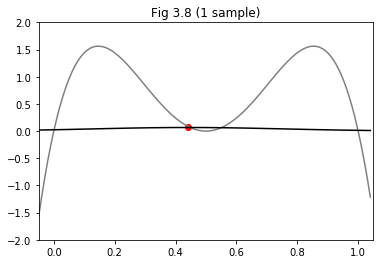

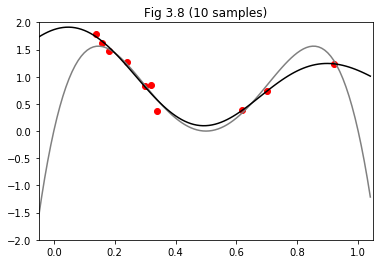

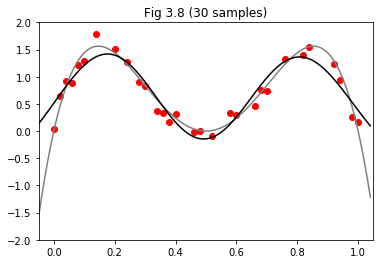

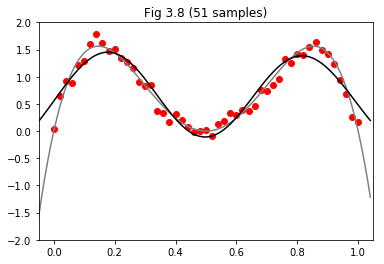

In [20]:
from pylab import *

S     = 0.1
ALPHA = 0.1
BETA  = 9

def sub(xs, ts):
    # φj(x) にガウス基底関数を採用
    def gaussian_basis_func(s, mu):
        return lambda x:exp(-(x - mu)**2 / s)

    # φ(x)
    def gaussian_basis_funcs(s, xs):
        return [gaussian_basis_func(s, mu) for mu in xs]

    xs9 = arange(0, 1.01, 0.125) # 9 points
    bases = gaussian_basis_funcs(S, xs9)

    N = size(xs) # データの点数
    M = size(bases) # 基底関数の数

    def Phi(x):
        return array([basis(x) for basis in bases])

    # Design matrix
    PHI = array(map(Phi, xs))
    PHI.resize(N, M)

    # predictive distribution
    def predictive_dist_func(alpha, beta):
        S_N_inv = alpha * eye(M) + beta * dot(PHI.T, PHI)
        m_N = beta * solve(S_N_inv, dot(PHI.T, ts)) # 20.1

        def func(x):
            Phi_x = Phi(x)
            mu = dot(m_N.T, Phi_x)
            s2_N = 1.0/beta + dot(Phi_x.T, solve(S_N_inv, Phi_x))
            return (mu, s2_N)

        return m_N, S_N_inv, func

    xmin = -0.05
    xmax =  1.05
    ymin = -2.0
    ymax =  2.0

    #
    # 図3.8
    #
    clf()
    axis([xmin, xmax, ymin, ymax])
    title("Fig 3.8 (%d sample%s)" % (N, 's' if N > 1 else ''))

    x_ = arange(xmin, xmax, 0.01)
    plot(x_, -100 * x_ * (x_ - 0.5)**2 * (x_ - 1), color='gray')

    m_N, S_N_inv, f = predictive_dist_func(ALPHA, BETA)

    y_h = []
    y_m = []
    y_l = []
    for mu, s2 in map(f, x_):
        s = sqrt(s2)
        y_m.append(mu)
       
    plot(x_, y_m, color='#000000')

    scatter(xs, ts, color='r', marker='o')
    show()

   

def main():
    # サンプルデータ（ガウスノイズを付加します）
    xs = arange(0, 1.01, 0.02)
    ts = -100 * xs * (xs - 0.5)**2 * (xs - 1) + normal(loc=0.0, scale=0.1, size=size(xs))

    # サンプルデータから適当な個数だけ拾う
    def randidx(n, k):
        r = range(n)
        shuffle(r)
        return sort(r[0:k])

    for k in (1, 10, 30, 100):
        indices = randidx(size(xs), k)
        sub(xs[indices], ts[indices])


if __name__ == '__main__':
    main()


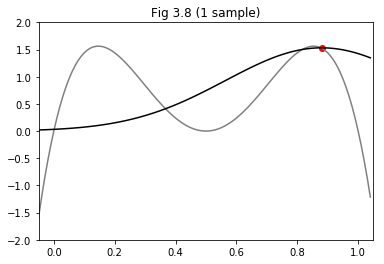

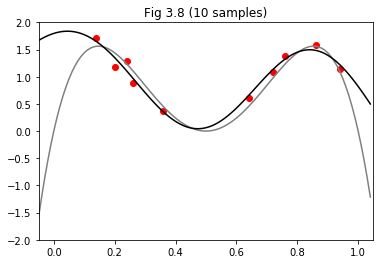

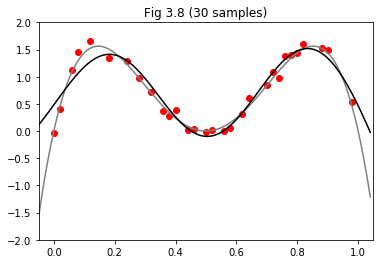

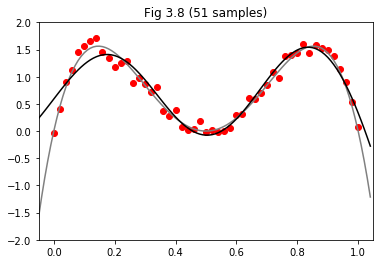

In [21]:
from pylab import *

S     = 0.1
ALPHA = 0.1
BETA  = 9

def sub(xs, ts):
    # φj(x) にガウス基底関数を採用
    def gaussian_basis_func(s, mu):
        return lambda x:exp(-(x - mu)**2 / s)

    # φ(x)
    def gaussian_basis_funcs(s, xs):
        return [gaussian_basis_func(s, mu) for mu in xs]

    xs9 = arange(0, 10.01, 0.125) # 90 points
    bases = gaussian_basis_funcs(S, xs9)

    N = size(xs) # データの点数
    M = size(bases) # 基底関数の数

    def Phi(x):
        return array([basis(x) for basis in bases])

    # Design matrix
    PHI = array(map(Phi, xs))
    PHI.resize(N, M)

    # predictive distribution
    def predictive_dist_func(alpha, beta):
        S_N_inv = alpha * eye(M) + beta * dot(PHI.T, PHI)
        m_N = beta * solve(S_N_inv, dot(PHI.T, ts)) # 20.1

        def func(x):
            Phi_x = Phi(x)
            mu = dot(m_N.T, Phi_x)
            s2_N = 1.0/beta + dot(Phi_x.T, solve(S_N_inv, Phi_x))
            return (mu, s2_N)

        return m_N, S_N_inv, func

    xmin = -0.05
    xmax =  1.05
    ymin = -2.0
    ymax =  2.0

    #
    # 図3.8
    #
    clf()
    axis([xmin, xmax, ymin, ymax])
    title("Fig 3.8 (%d sample%s)" % (N, 's' if N > 1 else ''))

    x_ = arange(xmin, xmax, 0.01)
    plot(x_, -100 * x_ * (x_ - 0.5)**2 * (x_ - 1), color='gray')

    m_N, S_N_inv, f = predictive_dist_func(ALPHA, BETA)

    y_h = []
    y_m = []
    y_l = []
    for mu, s2 in map(f, x_):
        s = sqrt(s2)
        y_m.append(mu)
       
    plot(x_, y_m, color='#000000')

    scatter(xs, ts, color='r', marker='o')
    show()

   

def main():
    # サンプルデータ（ガウスノイズを付加します）
    xs = arange(0, 1.01, 0.02)
    ts = -100 * xs * (xs - 0.5)**2 * (xs - 1) + normal(loc=0.0, scale=0.1, size=size(xs))

    # サンプルデータから適当な個数だけ拾う
    def randidx(n, k):
        r = range(n)
        shuffle(r)
        return sort(r[0:k])

    for k in (1, 10, 30, 100):
        indices = randidx(size(xs), k)
        sub(xs[indices], ts[indices])


if __name__ == '__main__':
    main()
